In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [2]:
data = pd.read_excel(r'C:\Users\AmanovRA\Anaconda3\My\Re_telefon\ву.xlsx')
data

,Номер карты,Дата последнего посещения Пациента,Категория клиента,Max([Возраст]),Sum([Стоимость полная]),Телефон
0,61,2020-03-16,СК факт,57,3300.0,900-15-37 основной; р/т 321-61-61; 89219001537
1,82,2020-03-13,МЦ АБ,30,14737.4,",8 921 955 24 83-Юля"
2,168,2020-03-25,НАЛ,23,2050.0,"7666881 , 8 911 273 23 48"
3,253,2020-02-27,НАЛ,72,2700.0,"8(921) 751 03 88 ,88125904384!!!, 974-39-07д.Е..."
4,286,2020-03-24,СК факт,62,9100.0,"3715794, р/т 3881639, 8-921-322-57-84"
...,...,...,...,...,...,...
23503,990502521,2020-04-21,НАЛ,88,1800.0,", +7(921)302-81-08"
23504,990502538,2020-04-21,НАЛ,74,3000.0,", +7(905)218-44-48"
23505,990502547,2020-04-22,НАЛ,73,2500.0,", +7(921)857-35-13"
23506,990502548,2020-04-22,НАЛ,77,2250.0,", +7(904)334-12-14"


In [10]:
data = data.loc[:, [line for line in data.columns if line in ('Номер карты', 'Sum([Стоимость полная])', 'Телефон')]]
phones = list(data['Телефон'])
phones


['900-15-37 основной; р/т 321-61-61; 89219001537',
 ',8 921 955 24 83-Юля',
 '7666881  , 8 911 273 23 48',
 '8(921) 751 03 88 ,88125904384!!!, 974-39-07д.Елена',
 '3715794, р/т 3881639, 8-921-322-57-84',
 '3209493, р/т 3216161,89119957506',
 '394-96-26, 8921-967-87-79,р.321-61-71(61) звонить по тел. 8-921-338-56-62 супруга(Нона Кимовна)',
 '+7(964)-378-52-46',
 '2698487, 388-16-39, 8-921-408-76-94',
 'д/т 3421941,  р/т 3216161.8-921-420-10-16',
 '394-31-05, 967-87-81, р/т 3216171',
 'р 388-16-39, 3878415,8-921-967-34-98',
 '+7(921)9641315',
 'р.321-61-71(61), +7(921) 960-58-42',
 'р/т 3216161,8-921-955-06-96',
 'д/т 5343980,349-34-90',
 '+7921-445-27-89 звонить на этот !!!, 7-911-840-51-87',
 'р.321-61-71(61),295-72-27,343-20-08, 8-921-947-86-41',
 'моб 8921 754 2407!!д/т 3440974, р/т 3432276, 3216171',
 'д/т 5502904, +7(921)932-28-50, р/т 3216161',
 'д/т 344-47-82 ,р/т3278671;м89218969556',
 '8921-3141639, 5411514, р.т. 3881739, 3881639',
 '!!8921-632-87-61,!!!4475859, 9366218,2681654

In [61]:
pattern = r'\(\d{2}\)'


for i, j in enumerate(phones):
    if re.search(pattern, j):
        if '(61)' in j:
            phones[i] = phones[i].replace('(61)', ', 321-61-61, ')
        elif  '(39)' in j:   
            phones[i] = phones[i].replace('(39)', ', 305-73-39, ')
        elif '(73)' in j:
            phones[i] = phones[i].replace('(73)', '')
            phones[i] += ' , 558-73-09 '
        elif ('21') in j:
            phones[i] = phones[i].replace('(21)', '(921)')
    phones[i] = phones[i].replace(',', ' ')
    phones[i] = phones[i].replace(';', ' ')
    phones[i] = phones[i].replace('!', ' ')
    phones[i] = phones[i].replace(':', ' ')
    phones[i] = phones[i].replace('.', ' ')
    phones[i] = phones[i].replace('\\', ' ')
    phones[i] = phones[i].replace('/', ' ')
    phones[i] = phones[i].replace('+', ' ')
    phones[i] = phones[i].lstrip(' ')
    phones[i] = phones[i].rstrip(' ')
    if '!' in j: print(j)
        
phones   
   

['900-15-37     321-61-61  89219001537',
 '8 921 955 24 83-',
 '7666881    8 911 273 23 48',
 '8(921) 751 03 88  88125904384     974-39-07',
 '3715794    3881639  8-921-322-57-84',
 '3209493    3216161 89119957506',
 '394-96-26  8921-967-87-79  321-61-71  321-61-61       8-921-338-56-62 ( )',
 '7(964)-378-52-46',
 '2698487  388-16-39  8-921-408-76-94',
 '3421941     3216161 8-921-420-10-16',
 '394-31-05  967-87-81    3216171',
 '388-16-39  3878415 8-921-967-34-98',
 '7(921)9641315',
 '321-61-71  321-61-61     7(921) 960-58-42',
 '3216161 8-921-955-06-96',
 '5343980 349-34-90',
 '7921-445-27-89         7-911-840-51-87',
 '321-61-71  321-61-61   295-72-27 343-20-08  8-921-947-86-41',
 '8921 754 2407    3440974    3432276  3216171',
 '5502904   7(921)932-28-50    3216161',
 '344-47-82   3278671 89218969556',
 '8921-3141639  5411514     3881739  3881639',
 '8921-632-87-61    4475859  9366218 2681654',
 '7(921)646-15-82',
 '7(921)646-15-82',
 '90605842  321-61-71  321-61-61    559-32-62  89

In [66]:
pattern2 = r'[а-яА-Яa-zA-Z]{1}'
for i, j in enumerate(phones):
    if re.search(pattern2, j):
        phones[i] = re.sub(pattern2, '', j)

In [72]:
pattern3 = r'[\(\)-]{1}'
for i, j in enumerate(phones):
    if re.search(pattern2, j):
        phones[i] = re.sub(pattern3, '', j)

In [76]:
for i, j in enumerate(phones):
    phones[i] = phones[i].replace('(', '')
    phones[i] = phones[i].replace(')', '')
    phones[i] = phones[i].replace('-', '')
        

In [116]:
pattern4 = r'\d{1}( ){1}\d{1}'

phones2 = phones.copy()

In [117]:
for i, j in enumerate(phones2):
    phones2[i] = j.split()

In [118]:
phones2

[['9001537', '3216161', '89219001537'],
 ['8', '921', '955', '24', '83'],
 ['7666881', '8', '911', '273', '23', '48'],
 ['8921', '751', '03', '88', '88125904384', '9743907'],
 ['3715794', '3881639', '89213225784'],
 ['3209493', '3216161', '89119957506'],
 ['3949626', '89219678779', '3216171', '3216161', '89213385662'],
 ['79643785246'],
 ['2698487', '3881639', '89214087694'],
 ['3421941', '3216161', '89214201016'],
 ['3943105', '9678781', '3216171'],
 ['3881639', '3878415', '89219673498'],
 ['79219641315'],
 ['3216171', '3216161', '7921', '9605842'],
 ['3216161', '89219550696'],
 ['5343980', '3493490'],
 ['79214452789', '79118405187'],
 ['3216171', '3216161', '2957227', '3432008', '89219478641'],
 ['8921', '754', '2407', '3440974', '3432276', '3216171'],
 ['5502904', '79219322850', '3216161'],
 ['3444782', '3278671', '89218969556'],
 ['89213141639', '5411514', '3881739', '3881639'],
 ['89216328761', '4475859', '9366218', '2681654'],
 ['79216461582'],
 ['79216461582'],
 ['90605842', '32

In [119]:
from functools import reduce


In [120]:
for i, j in enumerate(phones2):
    try:
        phones2[i].append(reduce(lambda x, y: x + y, [z for z in j if len(z) < 7]))
    except:
        continue

In [121]:
for i, j in enumerate(phones2):
    for x, y in enumerate(j):
        if x != len(j) - 1:
            if len(y) == 4 and len(j[x + 1]) == 7 and y[:2] in ('79', '89'):
                    phones2[i].append(y + j[x + 1])
            elif y in ('7', '8') and len(j[x + 1]) == 10:
                phones2[i].append(y + j[x + 1])
                


In [124]:
for i, j in enumerate(phones2):
    phones2[i] = [x for x in phones2[i] if len(x) >= 7]

In [177]:
for i, j in enumerate(phones2):
    for x, y in enumerate(j):
        if len(y) == 7:
            phones2[i][x] = '7812' + phones2[i][x]
        elif len(y) == 11 and y[0] == '8':
            phones2[i][x] = '7' + y[1:]
        elif len(y) == 10:
            phones2[i][x] = '7' + y

In [178]:
phones2

[['78129001537', '78123216161', '79219001537'],
 ['79219552483'],
 ['78127666881', '79112732348'],
 ['78125904384', '78129743907', '79217510388'],
 ['78123715794', '78123881639', '79213225784'],
 ['78123209493', '78123216161', '79119957506'],
 ['78123949626', '79219678779', '78123216171', '78123216161', '79213385662'],
 ['79643785246'],
 ['78122698487', '78123881639', '79214087694'],
 ['78123421941', '78123216161', '79214201016'],
 ['78123943105', '78129678781', '78123216171'],
 ['78123881639', '78123878415', '79219673498'],
 ['79219641315'],
 ['78123216171', '78123216161', '78129605842', '79219605842'],
 ['78123216161', '79219550696'],
 ['78125343980', '78123493490'],
 ['79214452789', '79118405187'],
 ['78123216171', '78123216161', '78122957227', '78123432008', '79219478641'],
 ['78123440974', '78123432276', '78123216171', '79217542407'],
 ['78125502904', '79219322850', '78123216161'],
 ['78123444782', '78123278671', '79218969556'],
 ['79213141639', '78125411514', '78123881739', '7812

In [179]:
data['Чистые_телефоны'] = phones2

In [180]:
data

,Номер карты,Sum([Стоимость полная]),Телефон,Чистые_телефоны,reklama
0,61,3300.0,900-15-37 основной; р/т 321-61-61; 89219001537,"[78129001537, 78123216161, 79219001537]",False
1,82,14737.4,",8 921 955 24 83-Юля",[79219552483],False
2,168,2050.0,"7666881 , 8 911 273 23 48","[78127666881, 79112732348]",False
3,253,2700.0,"8(921) 751 03 88 ,88125904384!!!, 974-39-07д.Е...","[78125904384, 78129743907, 79217510388]",False
4,286,9100.0,"3715794, р/т 3881639, 8-921-322-57-84","[78123715794, 78123881639, 79213225784]",False
...,...,...,...,...,...
23503,990502521,1800.0,", +7(921)302-81-08",[79213028108],False
23504,990502538,3000.0,", +7(905)218-44-48",[79052184448],False
23505,990502547,2500.0,", +7(921)857-35-13",[79218573513],False
23506,990502548,2250.0,", +7(904)334-12-14",[79043341214],False


In [181]:
reklama = pd.read_excel(r'C:\Users\AmanovRA\Anaconda3\My\Re_telefon\111.xlsx')

In [182]:
reklama_numbers = [str(i)[:-2] for i in list(reklama['Клиент: телефон'])]

In [185]:
arr = []
for i, j in enumerate(data['Чистые_телефоны']):
    arr.append([])
    for x in j:
        if x in reklama_numbers:
            arr[i].append(True)
        else:
            arr[i].append(False)
            

In [186]:
for i, j in enumerate(arr):
    arr[i] = any(j)

In [187]:
data[['reklama']] = arr 

In [188]:
data['reklama'].value_counts()

False    23501
True         7
Name: reklama, dtype: int64

In [189]:
data[data['reklama'] == True]

,Номер карты,Sum([Стоимость полная]),Телефон,Чистые_телефоны,reklama
9026,100176026,7500.0,", +7(921)574-13-28",[79215741328],True
9532,100178853,3000.0,", +7(931)578-84-18",[79315788418],True
10013,120095359,2700.0,89312666262мама папа +7-905-257-66-26,"[79312666262, 79052576626]",True
15862,120473123,3000.0,", +7(921)950-96-65, 9219531004 жена Елена!!!","[79219509665, 79219531004]",True
16561,120505988,4100.0,", +7(921)326-40-52",[79213264052],True
19709,120580367,3000.0,", +7(911)128-62-60",[79111286260],True
20292,260001556,4500.0,", +7(921)936-92-22",[79219369222],True


In [190]:
data.to_excel("output.xlsx")

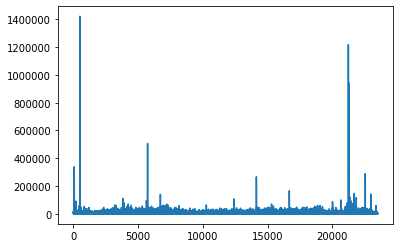

In [192]:
data['Sum([Стоимость полная])'].plot()